#**REPORTE 7**
**Nombre**: Alessandra Marcela Marocho Pacheco 

**Código**: 20201319

# **LECTURA**
El artículo *“The effects of exposure to better neighborhoods on children: new evidence from the Moving to Opportunity Experiment”* se concentra en analizar los resultados del programa Moving To Opportunity, un experimento realizado entre 1994 y 1998 que impulsó el traslado de familias que vivían en zonas con un alto nivel de pobreza a vecindarios menos pobres. En el marco de la investigación, los autores se enfocan principalmente en determinar cuáles fueron los efectos que trajo consigo el traslado a barrios con un menor índice de pobreza en los menores de edad que conformaban las familias que participaron de MTO. Con la finalidad de conocer tales resultados, el trabajo realizado se concentra en recolectar datos sobre los ingresos económicos de los niños en la actualidad, su asistencia y la calidad universitaria, las características del barrio en el que viven en la actualidad, entre otros. Asimismo, logran determinar que existe una distinción en los resultados entre aquellos niños y niñas que tenían menos de 13 años y el grupo de 13 a 18 años de edad. 

Entre las fortalezas del enfoque de la investigación, podemos identificar en primer lugar, la asignación aleatoria de la prueba. Como se detalla, al realizar esta clase de división entre las familias con características económicas similares, es posible obtener al final resultados concluyentes sobre el experimento. Igualmente, debido a los patrones de seguimiento y la data empleada para distinguir a los participantes del experimento, es posible obtener resultados claros sobre las diferencias, por ejemplo, entre los ingresos del grupo experimental y el grupo de control. No obstante, el enfoque de la investigación no nos permite extrapolar los resultados obtenidos hacia todas las familias, siendo una de sus debilidades. De ser lo anterior cierto, nos llevaría a afirmar que todos aquellos niños que son parte de las familias del experimento deberían haber mejorado significativamente su calidad de vida, teniendo ahora mayores ingresos económicos y viviendo mejores vecindarios, como si se tratará de una relación causal. 

La investigación amplía las conclusiones de otras investigaciones previas realizadas sobre el presente experimento. Debido a ello, el principal aporte del trabajo se encuentra al demostrar con sus hallazgos que el cambio del entorno social en el que un niño vive hasta cierta edad puede tener influir en su vida adulta. La presencia de una correlación entre haber sido parte de una mudanza a una zona con un menor índice de pobreza a cierta edad y los futuros ingresos económicos entre sus miembros jóvenes logra ser ilustrada. Igualmente, los resultados del análisis pueden ser beneficiosos para tener un mejor enfoque sobre las políticas públicas que se desarrollen en el mismo ámbito. Por medio del mismo, se puede comprobar que, para obtener resultados más satisfactorios en el futuro, se debe considerar la edad de los niños como un aspecto primordial. Igualmente, se logró determinar que una definición sobre el nivel de pobreza sobre el barrio de destino tiene un mayor efecto que aquellos que pertenecieron al grupo S8, puesto que muchos terminaron viviendo en mejores zonas, pero dentro del mismo vecindario. Finalmente, al determinar que el traslado de vecindario entre adultos no tiene efecto alguno, permite que futuras acciones se concentren en direccionar sus propuestas a grupos de la población específicos. 

Finalmente, las investigaciones en el mismo marco ciertamente seguirán desarrollándose, teniendo en cuenta el amplio número de trabajos que ya se han realizado distintos análisis sobre el MTO. De igual manera, resulta interesante el análisis realizado en el artículo [“Do changes in neighborhood social context mediate the effects of the moving to opportunity experiment on adolescent mental health?”]( https://doi.org/10.1016/j.healthplace.2020.102331) realizada por Schmidt y otros, porque analiza, en un grupo similar de edad al establecido en este trabajo, otro de los efectos más inmediatos que puede tener el presente experimento en la salud mental de adolescentes de ambos géneros. Debido a ello, podemos concluir que un experimento como este brinda la oportunidad para conocer los efectos del cambio de vecindario desde distintas miradas. 

**Bibliografía**

1. Nicole M. Schmidt, Quynh C. Nguyen, Rebecca Kehm, Theresa L. Osypuk (2020) Do changes in neighborhood social context mediate the effects of the moving to opportunity experiment on adolescent mental health?, 63(2020), 1-9.




In [8]:
pip install causalgraphicalmodels
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
import seaborn as sns
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col

#**CÓDIGO**
##**Ploteo de Histogramas**

In [12]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [13]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


In [14]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" ))) 

In [15]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [16]:
pd.get_dummies(data_2)

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


In [21]:
data_2.groupby(["class_format"]).mean()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


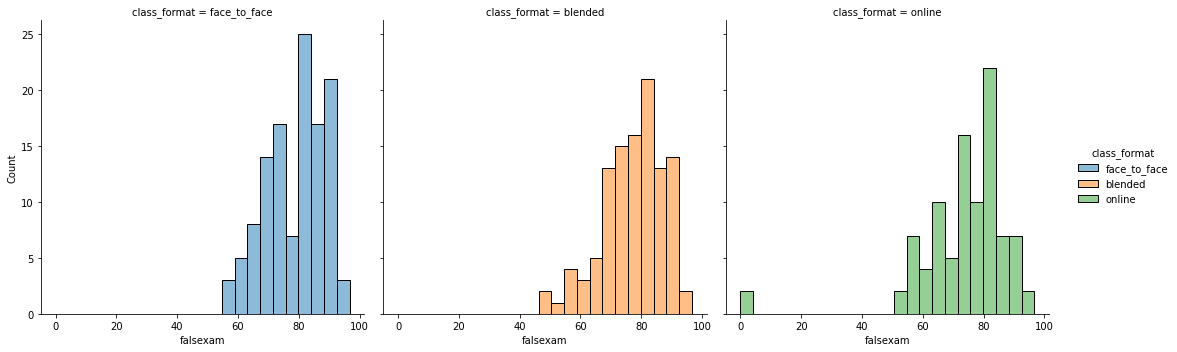

In [26]:
sns.displot(data_2, x="falsexam",col="class_format", hue = "class_format")

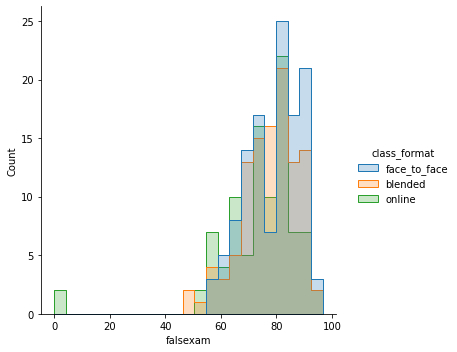

In [27]:
sns.displot(data_2, x="falsexam", hue = "class_format", element="step")


###**Interpretación:**
Por medio del último histograma podemos distinguir que, entre los estudiantes que realizaron clases presenciales, hay una mayor concentración de notas elevadas.

De igual manera, para aquellos estudiantes que realizaron tanto clases presenciales como online, vemos una menor homogeneidad entre los resultaods de los estudiantes, que no llegan a ser tan positivos como los obtenidos en clases presenciales, y reducidos, como los estudiantes de clases online. Igualmente, obtener un resultado entre 95 y 100 también es reducido en las tres modalidades de clase.


Finalmente, en cuanto al histograma relacionado con las clases online, se evidencia cómo el promedio de notas tiene una gran caída al alcanzar la posición 80, en comparación con los otros histogramas. Podemos inferir entonces que, el desarrollo de este tipo de clases tuvo un efecto negativo en los puntajes estudiantiles. 

# **Difference-in-means estimator**
